#Limite y calculo de errores de computo y errores de propagación
## Taller 1 Métodos numéricos

Miguel Ángel Jaramillo Quenguan 

Universidad del Valle


Mayo 5 de 2022

presentado a Miguel Angel Vargas Valencia.

curso de metodos Numericos 



------


### Punto 1
Escribe un programa en Python para calcular la constante matemática e, a
partir de la denición

$$e=\lim_{n\to \infty}(1+\frac{1}{n}),$$

es decir, calcula $(1+\frac{1}{n})^n$ para $n=10^k
, k = 1, 2, ..., 20$. Determina el error en tus aproximaciones comparándolas con exp(1) (usa la función exp de Numpy), genera un gráfico para visualizar los resultados. (Comenta y análisa tus resul-
tados.)

lista de n [10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000, 100000000000, 1000000000000, 10000000000000, 100000000000000, 1000000000000000, 10000000000000000, 100000000000000000, 1000000000000000000, 10000000000000000000]
lista de e aproximado [2.5937424601000023, 2.7048138294215285, 2.7169239322355936, 2.7181459268249255, 2.7182682371922975, 2.7182804690957534, 2.7182816941320818, 2.7182817983473577, 2.7182820520115603, 2.7182820532347876, 2.71828205335711, 2.7185234960372378, 2.716110034086901, 2.716110034087023, 3.035035206549262, 1.0, 1.0, 1.0, 1.0]

lista de error[0.12453936835904278, 0.01346799903751661, 0.0013578962234515046, 0.000135901634119584, 1.359126674760347e-05, 1.359363291708604e-06, 1.3432696333026684e-07, 3.011168736577474e-08, 2.2355251516614771e-07, 2.2477574246337895e-07, 2.248980650598753e-07, 0.00024166757819266138, 0.002171794372144209, 0.0021717943720220845, 0.31675337809021675, 1.718281828459045, 1.718281828459045, 1.718281

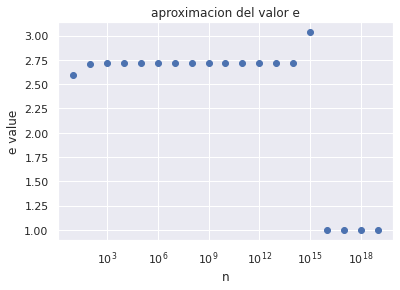

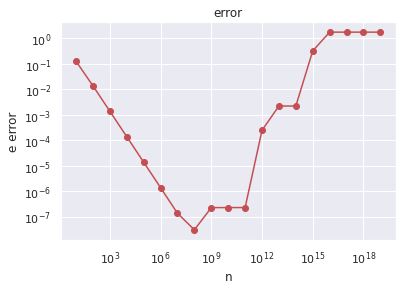

In [ ]:
#calculando e mediante definicion en limite
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

n_list=[]
for k in range(1,20):
  a=10**k
  n_list.append(a)

print(f'lista de n {n_list}')


e_list=[]

for n in n_list:
  e=(1+1/n)**n
  e_list.append(e)

print(f'lista de e aproximado {e_list}\n')

ee_list=[]#lista de error de e respecto a e de la libreria numpy

for e in e_list:
  error=np.abs(np.e-e)
  ee_list.append(error)

print(f'lista de error{ee_list}')


#graficando e aproximado
x=[]
for i in range (1,20):
  x.append(i)

nlog_list=[]
for k in n_list:
  j=np.log10(k)
  nlog_list.append(j)
  

plt.title('aproximacion del valor e')
plt.xlabel('n')
plt.ylabel('e value')
plt.semilogx(n_list,e_list,'bo')
#plt.plot(e_list,'bo')
plt.show()


plt.title('error')
plt.xlabel('n')
plt.ylabel('e error')
plt.loglog(n_list,ee_list,'ro-')
plt.show()


# Analizando el punto 1

debido que la maquina no es capaz de manejar un numero infinito de decimales estamos limitados a la cantidad que se puede representar en la mantiza en un determinado tamaño de palabra. por este metivo luego de llegar a este limite el valor aproximado de e falla y la maquina un valor de 1.

tambien es apreciable que el valor de error respecto al numero e en el paquete numpy es variable esto debido a la distribucion de numeros de punto flotante que se realiza tambien debido a la limitacion del tamaño de palabra.


### Punto 2
Supongase que quieres calcular $n + 1$ puntos equiespaciados en el intervalo$  [a, b]$,
con espacio $h=\frac{b − a}{n}$

a) Usando aritmética de punto otante, cual de los siguientes dos métodos:

Método 1:

$$x_0 = a, x_k = x_{k−1} + h, k = 1, 2, ..., n$$

Método 2:

$$x_k = a + kh, k = 0, 1, ..., n$$

es más preciso y por qué?

b) Implementa ambos métodos con a = 0 y b = 1 para ilustrar la diferencia,
calcula las diferencias absolutas entre cada elemento de los espaciamientos
y genera un gráco que permita visualizarlas. (Comenta y análisa tus
resultados.)


valor de h:0.01
lista de sumas desde a sumando h [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.5300000000000002, 0.5400000000000

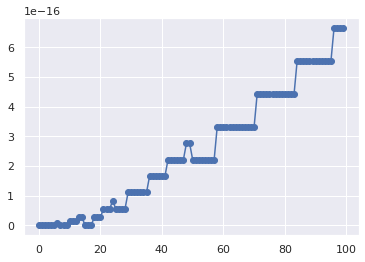

In [ ]:
# sumas iteradas
a=0
b=1
n=100
h=(b-a)/n
print(f'valor de h:{h}')

#metodo 1
list_sum1=[]
z=a
for k in range(n+1):
  list_sum1.append(z)
  z=z+h
print(f'lista de sumas desde a sumando h {list_sum1}')



#metodo 2
list_sum2=[]
w=a
c=a
for k in range(n+1): 
  w=c+k*h
  list_sum2.append(w) 
print(f'lista de sumas desde a sumando k por h {list_sum2}')

#diferencias
error_list=[]

for i in range(n):
  error=np.abs(list_sum1[i]-list_sum2[i])
  error_list.append(error)
print(f'lista de errores{error_list}')
#error_list.remove(0)

#plt.ylim(-0.040,0.040)
plt.plot(error_list,'bo-') 
plt.show()

  #revizar el rango de los arrglos n o n+1

# Analizando el punto 2

la suma no es asociativa debido a la limitada por el tamaño de palabra no puedo sumar un numero menor al epsilon de maquina. 



implicaciones de dividir por un numero muy pequeño


### Punto 3 

Escribe un programa que calcule el valor aproximado de la derivada de una función usando diferencias finitas.

$$\frac{f(x+h)-f(x)}{h}.$$

Prueba tu programa usando la función $\sin{x}$ con $x=1$. determina el error comparando con la funcion $\cos{x}$. Haz una gráfica del error como función de h, con $h=10^k,k=-17,-16,⋯,0,1,2$

[-17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2]
aproximacion de derivadas: [0.0, 0.0, 0.5551115123125783, 0.5440092820663267, 0.5395683899678261, 0.5403455460850637, 0.5403011371640787, 0.5403022473871033, 0.5403023584094058, 0.5403023028982545, 0.5403022640404487, 0.5403018851213304, 0.5402980985058647, 0.5402602314186211, 0.5398814803603269, 0.536085981011869, 0.4973637525353891, 0.0678264420177852, -0.18414611913586, -0.0038944519762954596]
lista de error para cada k:[5.40302306e-01 5.40302306e-01 1.48092064e-02 3.70697620e-03
 7.33915900e-04 4.32402169e-05 1.16870406e-06 5.84810365e-08
 5.25412660e-08 2.96988523e-09 4.18276911e-08 4.20746809e-07
 4.20736228e-06 4.20744495e-05 4.20825508e-04 4.21632486e-03
 4.29385533e-02 4.72475864e-01 7.24448425e-01 5.44196758e-01]


Text(0, 0.5, 'error absoluto')

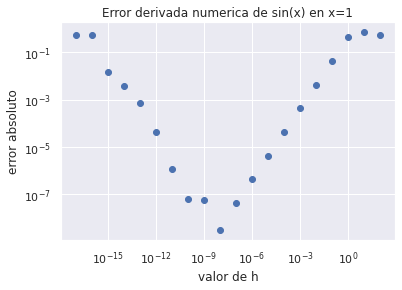

In [ ]:
#calculando la derivada numericamente de la funcion sin en x=1 

# creando una lista para los valores de h=10^K con K en [-17,2]
list_ks=[]
ks=-17
for m in range(20):
  list_ks.append(ks)
  ks=ks+1
print(list_ks)
D_apprx=[]
for k in list_ks:
  dx=(np.sin(1+10**k)-np.sin(1))/10**k
  D_apprx.append(dx)

print(f'aproximacion de derivadas: {D_apprx}')

#calculando error desde la funcion np.cos()
err=np.abs(D_apprx-np.cos(1))
print(f'lista de error para cada k:{err}')

list_hs=[]
for k in list_ks:
  list_hs.append(10**k)

plt.title('Error derivada numerica de sin(x) en x=1')
plt.loglog(list_hs,err,'bo')
plt.xlabel('valor de h')
plt.ylabel('error absoluto')


# Analizando el punto 3

El error para un valor de 10^-8 es el menor esto debido a que si escojemos un valor de h menor a lo que nos lo permita la maquina esta no nos calculara la mejor aproximacion esto debido a las limitaciones del tamaño de palabra.




# Referencias

* Pajankar, A. (2017). Introduction to NumPy. In Raspberry Pi Supercomputing and Scientific Programming (pp. 109-128). Apress, Berkeley, CA.

* Muqri, M. R., Wilson, E. J., & Shakib, J. (2015, June). A Taste of Python–Discrete and Fast Fourier Transforms. In 2015 ASEE Annual Conference & Exposition (pp. 26-123).

* Bisong, E. (2019). Matplotlib and Seaborn. In Building machine learning and deep learning models on google cloud platform (pp. 151-165). Apress, Berkeley, CA.

